In [138]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [139]:
# Read the data
df = pd.read_csv(r'C:\Users\Galy\movies.csv')

In [140]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [141]:
# See if there is any missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [142]:
#dealing with missing values:
#if there are 2 or more of missing values in a row-->eliminate row
df = df.dropna(thresh=len(df.columns) - 1)

In [143]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000.0,461421559.0,Beijing Diqi Yinxiang Entertainment,149.0
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,NaN,3661.0,Prowess Pictures,98.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,NaN,413378.0,Pryor Entertainment,120.0
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000.0,NaN,Notis Studio,78.0


In [144]:
#Replace missing values in the budget column with the median
median = df['budget'].median()
df['budget'] = df['budget'].fillna(median)

In [145]:
#Replace missing values in the gross column with the median
median2 = df['gross'].median()
df['gross'] = df['gross'].fillna(median2)

In [146]:
# See if there is any missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [147]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000.0,461421559.0,Beijing Diqi Yinxiang Entertainment,149.0
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,21000000.0,3661.0,Prowess Pictures,98.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,21000000.0,413378.0,Pryor Entertainment,120.0
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000.0,20348312.5,Notis Studio,78.0


In [148]:
#data types for the columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [149]:
#change the type of the columns budget, votes, and gross
df['budget'] = df['budget'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [150]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [153]:
#correct the year
df['correct_year'] = df['released'].astype(str).str.extract(r'(\d{4})')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0,2020
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400,Scott Teems,Scott Teems,Shea Whigham,United States,21000000,3661,Prowess Pictures,98.0,2020
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,21000000,413378,Pryor Entertainment,120.0,2020
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,20348312,Notis Studio,78.0,2020


In [154]:
df.dtypes

name             object
rating           object
genre            object
year              int64
released         object
score           float64
votes             int64
director         object
writer           object
star             object
country          object
budget            int64
gross             int64
company          object
runtime         float64
correct_year     object
dtype: object

In [155]:
df['correct_year'] = df['correct_year'].astype('int64')

In [156]:
df.dtypes

name             object
rating           object
genre            object
year              int64
released         object
score           float64
votes             int64
director         object
writer           object
star             object
country          object
budget            int64
gross             int64
company          object
runtime         float64
correct_year      int64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

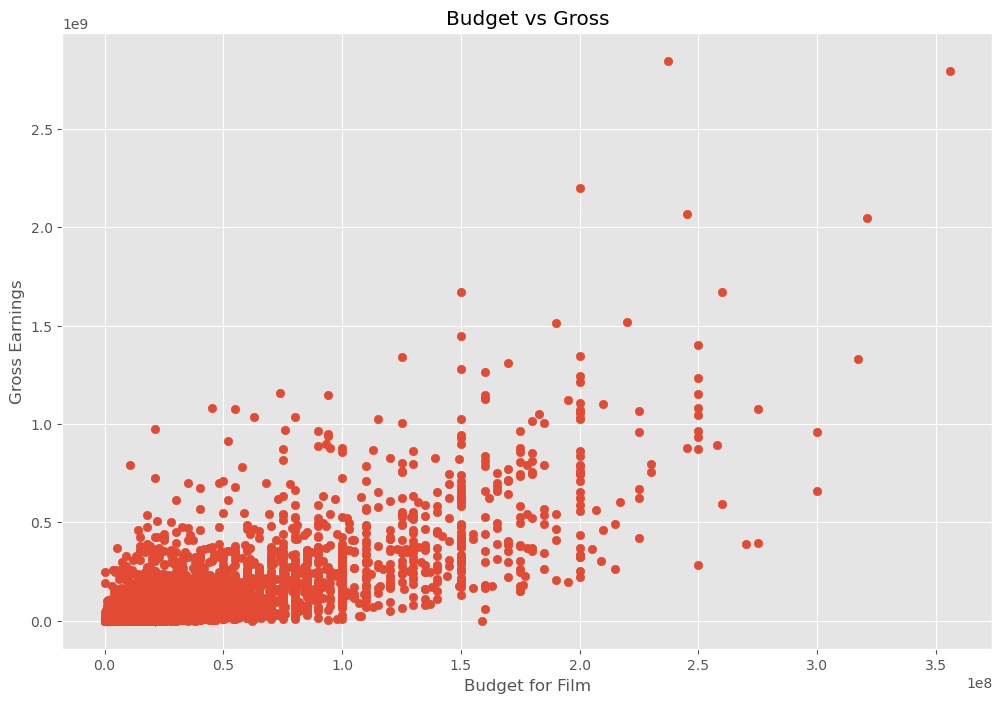

In [121]:
#Hypothesis: major gross in movies have a high correlation with:
#great budget
#Scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show

<Axes: xlabel='budget', ylabel='gross'>

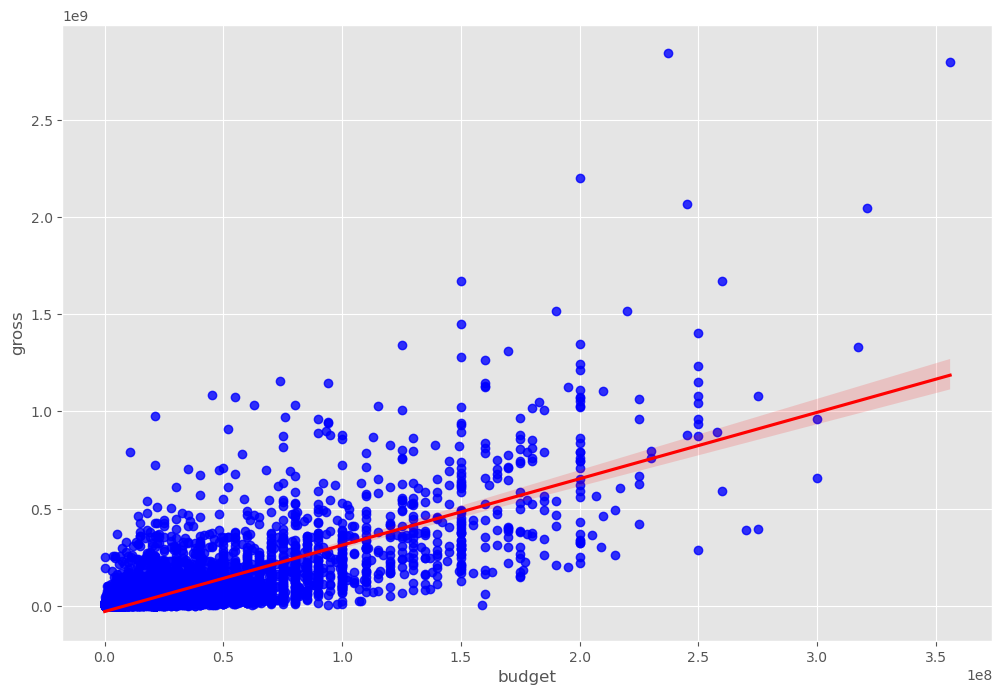

In [125]:
#plot the budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data= df, scatter_kws={"color":"blue"},line_kws={"color":"red"})

In [158]:
#look the correlation
df.corr(numeric_only = True)

,year,score,votes,budget,gross,runtime,correct_year
year,1.000000,0.097952,0.220935,0.294233,0.259543,0.115460,0.997516
score,0.097952,1.000000,0.414423,0.062165,0.188099,0.400132,0.105471
votes,0.220935,0.414423,1.000000,0.458134,0.631539,0.310226,0.216605
budget,0.294233,0.062165,0.458134,1.000000,0.745392,0.275019,0.286441
gross,0.259543,0.188099,0.631539,0.745392,1.000000,0.244856,0.252628
runtime,0.115460,0.400132,0.310226,0.275019,0.244856,1.000000,0.115190
correct_year,0.997516,0.105471,0.216605,0.286441,0.252628,0.115190,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

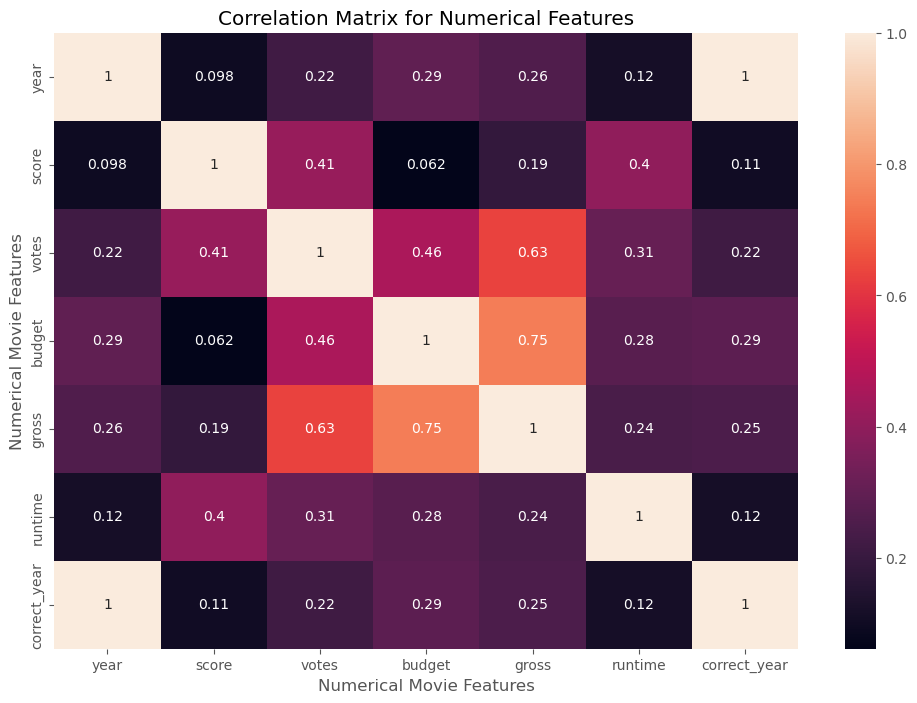

In [159]:
correlation_matrix = df.corr(numeric_only = True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numerical Features')
plt.xlabel('Numerical Movie Features')
plt.ylabel('Numerical Movie Features')
plt.show

In [160]:
#Hypothesis: major gross in movies have a high correlation with:
#Company name
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,6430,6,6,1980,1664,8.4,927000,2498,3892,992,54,19000000,46998772,2219,146.0,1980
1,5427,6,1,1980,1455,5.8,65000,2194,1581,310,55,4500000,58853106,699,104.0,1980
2,5007,4,0,1980,1728,8.7,1200000,1072,2492,1662,55,18000000,538375067,1469,124.0,1980
3,279,4,4,1980,1455,7.7,221000,1258,1942,2139,55,3500000,83453539,1727,88.0,1980
4,1002,6,4,1980,1504,7.3,108000,1018,504,392,55,6000000,39846344,1694,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,5641,3,0,2020,486,6.8,3700,1057,1620,2684,8,80000000,461421559,357,149.0,2020
7653,6323,6,5,2020,90,5.4,2400,2431,3766,2327,55,21000000,3661,1817,98.0,2020
7656,6853,5,4,2020,1842,5.0,294,2426,3759,2268,55,21000000,413378,1819,120.0,2020
7658,779,6,6,2020,1081,6.6,35,1711,1035,506,55,5000,20348312,1666,78.0,2020


In [162]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
name,1.000000,-0.009211,0.017065,0.010316,-0.010180,0.016296,0.012123,0.008531,0.009266,0.004995,-0.011819,0.020909,0.005733,0.008553,0.009089,0.009764
rating,-0.009211,1.000000,0.109309,0.026579,0.025214,0.012872,0.016261,0.013874,-0.004051,0.000178,0.037824,-0.141136,-0.126115,-0.079009,0.065442,0.026188
genre,0.017065,0.109309,1.000000,-0.086666,0.029818,0.040191,-0.148453,-0.013588,0.010551,-0.002041,-0.028776,-0.337654,-0.241754,-0.072320,-0.044828,-0.082392
year,0.010316,0.026579,-0.086666,1.000000,-0.001229,0.097952,0.220935,-0.023018,-0.011847,-0.031606,-0.079934,0.294233,0.259543,-0.011767,0.115460,0.997516
released,-0.010180,0.025214,0.029818,-0.001229,1.000000,0.042714,0.017424,-0.002924,-0.002187,0.016923,-0.019982,0.012555,0.000426,-0.007987,-0.002819,-0.005541
score,0.016296,0.012872,0.040191,0.097952,0.042714,1.000000,0.414423,0.007511,0.019780,-0.000643,-0.130943,0.062165,0.188099,0.000970,0.400132,0.105471
votes,0.012123,0.016261,-0.148453,0.220935,0.017424,0.414423,1.000000,-0.000610,0.000328,-0.021890,0.066157,0.458134,0.631539,0.129345,0.310226,0.216605
director,0.008531,0.013874,-0.013588,-0.023018,-0.002924,0.007511,-0.000610,1.000000,0.297390,0.036461,0.013468,-0.003966,-0.014861,0.001612,0.016144,-0.022804
writer,0.009266,-0.004051,0.010551,-0.011847,-0.002187,0.019780,0.000328,0.297390,1.000000,0.026855,0.013594,-0.031584,-0.023956,0.004601,-0.004689,-0.011960
star,0.004995,0.000178,-0.002041,-0.031606,0.016923,-0.000643,-0.021890,0.036461,0.026855,1.000000,-0.020443,-0.020282,-0.002328,0.009133,0.009999,-0.032365


<function matplotlib.pyplot.show(close=None, block=None)>

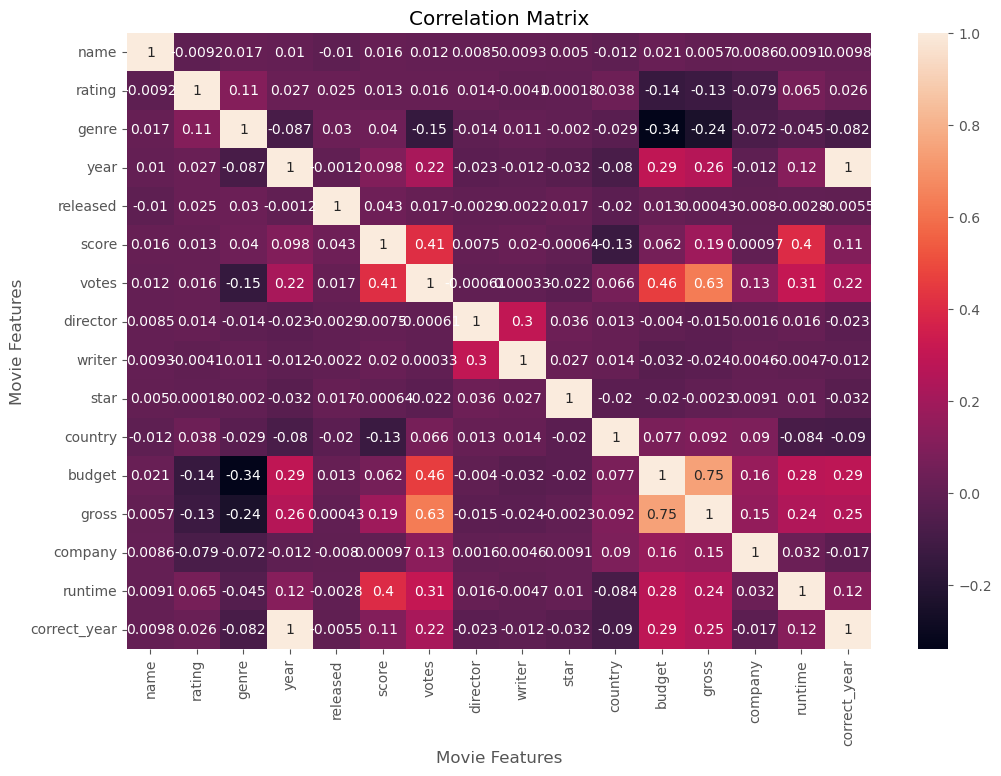

In [163]:
correlation_matrix = df_numerized.corr(method ='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [164]:
#a better way for visualize the correlation
corr_matrix = df_numerized.corr()
corr_pairs = corr_matrix.unstack()
corr_pairs

name          name            1.000000
              rating         -0.009211
              genre           0.017065
              year            0.010316
              released       -0.010180
                                ...   
correct_year  budget          0.286441
              gross           0.252628
              company        -0.016536
              runtime         0.115190
              correct_year    1.000000
Length: 256, dtype: float64

In [167]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.337654
budget        genre          -0.337654
gross         genre          -0.241754
genre         gross          -0.241754
              votes          -0.148453
                                ...   
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct_year  correct_year    1.000000
Length: 256, dtype: float64

In [168]:
#see the features with high correlation
high_correlation = sorted_pairs[(sorted_pairs) > 0.5]
high_correlation

gross         votes           0.631539
votes         gross           0.631539
budget        gross           0.745392
gross         budget          0.745392
year          correct_year    0.997516
correct_year  year            0.997516
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct_year  correct_year    1.000000
dtype: float64